In [27]:
# Assignment 15

# LGBM : Light Gradient Boosting Machine

# XGB : Extreme Gradient Boosting

In [28]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [32]:
# dropping non informative features

train_df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
test_df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [33]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
# missing values

print(train_df.isnull().mean()*100)

print(test_df.isnull().mean()*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64


In [36]:
# checking for duplicates

print(train_df.duplicated().sum())

print(test_df.duplicated().sum())

107
34


In [37]:
# checking for unqiue values 

cols = ['Sex','Embarked']

for col in cols:
    print(f'train {col} : {train_df[col].unique()}')

for col in cols:
    print(f'test {col} : {test_df[col].unique()}')


train Sex : ['male' 'female']
train Embarked : ['S' 'C' 'Q' nan]
test Sex : ['male' 'female']
test Embarked : ['Q' 'S' 'C']


In [38]:
# handling missing values

train_df.drop('Cabin',axis=1,inplace=True)

test_df.drop("Cabin",axis=1,inplace=True)

# dropping Cabin feature from both datasets as there are 77+% missing values

In [39]:
# imputing nan with most frequent value

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
# imputing missing values with 'Age' median values

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [41]:
# imputaing missing values with 'Fare' median value

test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [42]:
# rechecking missing values

print(train_df.isnull().mean()*100)

print(test_df.isnull().mean()*100)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64


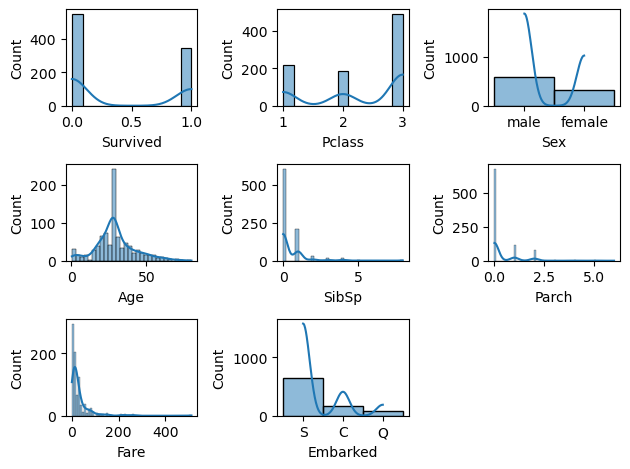

In [43]:
# plotting Histogram for training data
import matplotlib.pyplot as plt
import seaborn as sns

for i,col in enumerate(train_df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(train_df[col],kde=True)

plt.tight_layout()

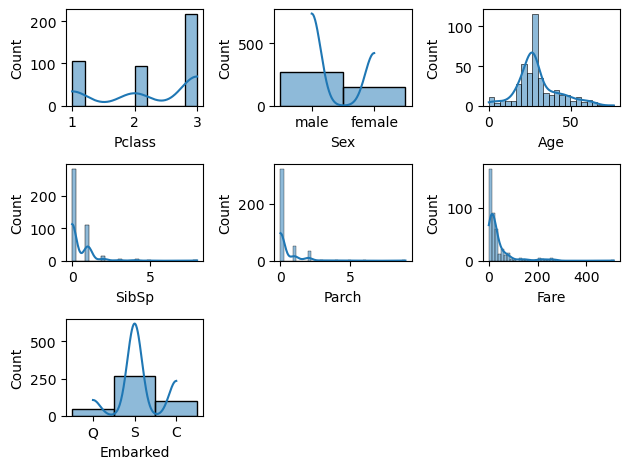

In [44]:
# plotting Histogram for testing data

for i,col in enumerate(test_df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(test_df[col],kde=True)

plt.tight_layout()

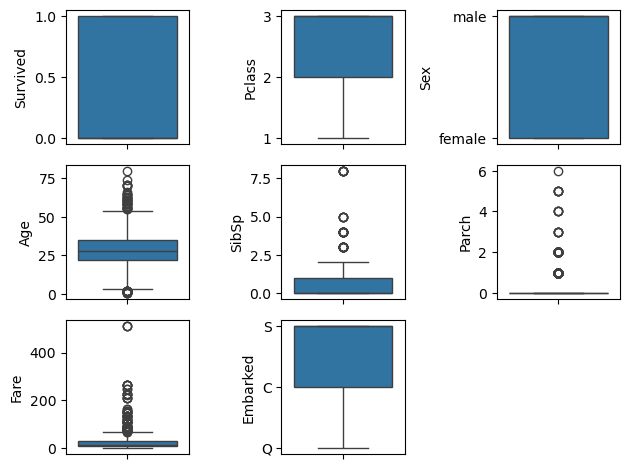

In [45]:
# plotting boxplot for testing data

for i,col in enumerate(train_df.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(train_df[col])

plt.tight_layout()

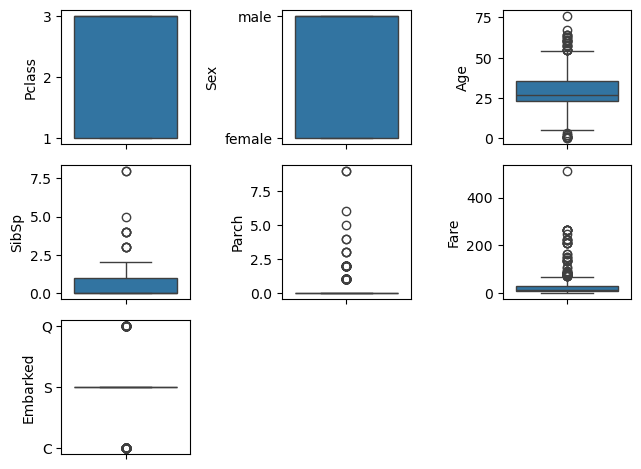

In [46]:
# plotting boxplot for testing data

for i,col in enumerate(test_df.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(test_df[col])

plt.tight_layout()

In [47]:
# segregating independent & target variables

X_train = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']

X_test = test_df

In [48]:
# label encoding 'Sex' & 'Embarked'

from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder()
X_train['Sex'] = sex_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = sex_encoder.transform(X_test['Sex'])  

embarked_encoder = LabelEncoder()
X_train['Embarked'] = embarked_encoder.fit_transform(X_train['Embarked'])
X_test['Embarked'] = embarked_encoder.transform(X_test['Embarked']) 

In [49]:
# Extreme Gradient Boosting classifier building,fitting,predicting

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)

In [50]:
# Light Gradient Boosting Machine classifier building,fitting,predicting

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

lgbm.fit(X_train,y_train)

lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [51]:
# splitting validation train & validation test
from sklearn.model_selection import train_test_split

X_val_train,X_val_test,y_val_train,y_val_test = train_test_split(X_train,y_train)

In [53]:
# performance measures on validation set
from sklearn.metrics import classification_report,accuracy_score

xgb_val = XGBClassifier()

xgb_val.fit(X_val_train,y_val_train)

xgb_val_pred = xgb_val.predict(X_val_test)

print(f'accuracy score = {accuracy_score(y_val_test,xgb_val_pred)}')
print(f'report \n {classification_report(y_val_test,xgb_val_pred)}')

accuracy score = 0.8251121076233184
report 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       143
           1       0.74      0.80      0.77        80

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.83      0.83       223



In [54]:
lgbm_val = LGBMClassifier()

lgbm_val.fit(X_val_train,y_val_train)

lgbm_val_pred = lgbm_val.predict(X_val_test)

print(f'accuracy score = {accuracy_score(y_val_test,lgbm_val_pred)}')
print(f'report \n {classification_report(y_val_test,lgbm_val_pred)}')

[LightGBM] [Info] Number of positive: 262, number of negative: 406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392216 -> initscore=-0.438009
[LightGBM] [Info] Start training from score -0.438009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [68]:
# confusion matrix
from sklearn.metrics import confusion_matrix,RocCurveDisplay

cm_xgb = confusion_matrix(y_val_test, xgb_val_pred)
cm_lgbm = confusion_matrix(y_val_test, lgbm_val_pred)

print(f'confusion matrix XGB classifier : \n {cm_xgb}')
print(f'confusion matrix LGBM classifier : \n {cm_lgbm}')

confusion matrix XGB classifier : 
 [[120  23]
 [ 16  64]]
confusion matrix LGBM classifier : 
 [[123  20]
 [ 18  62]]


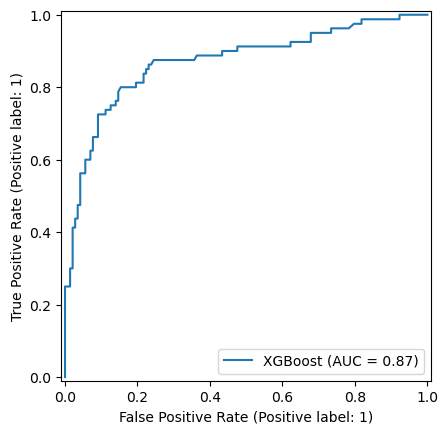

In [66]:
# ROC_curve for XGBClassifier
RocCurveDisplay.from_estimator(xgb_val, X_val_test, y_val_test, name="XGBoost")

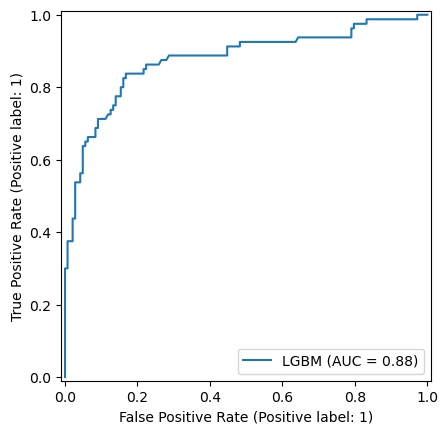

In [67]:
# ROC_curve for LGBMClassifier
RocCurveDisplay.from_estimator(lgbm_val, X_val_test, y_val_test, name="LGBM")